Using TensorFlow backend.


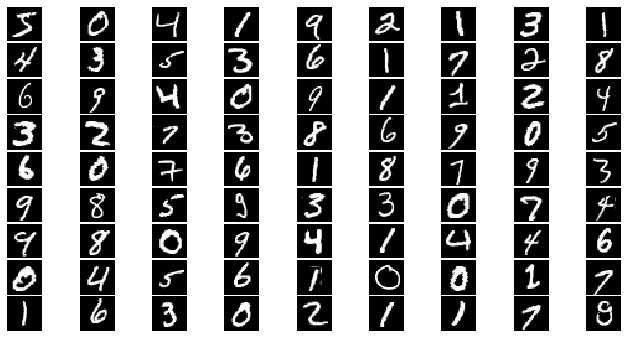

In [2]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

(x_train, y_train), (x_test, y_test) = mnist.load_data()

fig = plt.figure(figsize=(9, 9))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)
for i in range(81) :
  ax = fig.add_subplot(9, 9, i + 1, xticks=[], yticks=[])
  ax.imshow(x_train[i].reshape((28, 28)), cmap='gray')

In [0]:
# 2次元データを数値に変換
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# 型変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 
x_train /= 255
x_test /= 255

In [0]:
from keras.utils.np_utils import to_categorical
num_classes = 10
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')
# one-hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [0]:
# create model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [7]:
# バッチサイズ、エポック数
batch_size = 128
epochs = 20

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.2479 - acc: 0.9249 - val_loss: 0.1112 - val_acc: 0.9645
Epoch 2/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.1018 - acc: 0.9692 - val_loss: 0.0763 - val_acc: 0.9761
Epoch 3/20
28672/60000 [=============>................] - ETA: 5s - loss: 0.0693 - acc: 0.9786

60000/60000 [==============================] - 10s 167us/step - loss: 0.0712 - acc: 0.9779 - val_loss: 0.0605 - val_acc: 0.9806
Epoch 4/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0541 - acc: 0.9825 - val_loss: 0.0676 - val_acc: 0.9794
Epoch 5/20
59776/60000 [============================>.] - ETA: 0s - loss: 0.0460 - acc: 0.9847

60000/60000 [==============================] - 10s 167us/step - loss: 0.0461 - acc: 0.9847 - val_loss: 0.0643 - val_acc: 0.9808
Epoch 6/20
60000/60000 [==============================] - 10s 167us/step - loss: 0.0391 - acc: 0.9870 - val_loss: 0.0769 - val_acc: 0.9795
Epoch 7/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0333 - acc: 0.9885 - val_loss: 0.0830 - val_acc: 0.9775
Epoch 8/20
 5120/60000 [=>............................] - ETA: 8s - loss: 0.0252 - acc: 0.9908

60000/60000 [==============================] - 10s 166us/step - loss: 0.0321 - acc: 0.9893 - val_loss: 0.0682 - val_acc: 0.9808
Epoch 9/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0275 - acc: 0.9908 - val_loss: 0.0661 - val_acc: 0.9817
Epoch 10/20
55040/60000 [==========================>...] - ETA: 0s - loss: 0.0218 - acc: 0.9929

60000/60000 [==============================] - 10s 167us/step - loss: 0.0225 - acc: 0.9926 - val_loss: 0.0701 - val_acc: 0.9827
Epoch 11/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0246 - acc: 0.9916 - val_loss: 0.0727 - val_acc: 0.9811
Epoch 12/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0240 - acc: 0.9922 - val_loss: 0.0652 - val_acc: 0.9830
Epoch 13/20
 3968/60000 [>.............................] - ETA: 9s - loss: 0.0182 - acc: 0.9934

60000/60000 [==============================] - 10s 167us/step - loss: 0.0189 - acc: 0.9935 - val_loss: 0.0647 - val_acc: 0.9852
Epoch 14/20
60000/60000 [==============================] - 10s 166us/step - loss: 0.0206 - acc: 0.9933 - val_loss: 0.0628 - val_acc: 0.9844
Epoch 15/20
54656/60000 [==========================>...] - ETA: 0s - loss: 0.0194 - acc: 0.9934

60000/60000 [==============================] - 10s 165us/step - loss: 0.0197 - acc: 0.9935 - val_loss: 0.0640 - val_acc: 0.9848
Epoch 16/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0187 - acc: 0.9939 - val_loss: 0.0672 - val_acc: 0.9833
Epoch 17/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0188 - acc: 0.9941 - val_loss: 0.0708 - val_acc: 0.9841
Epoch 18/20
 3584/60000 [>.............................] - ETA: 8s - loss: 0.0099 - acc: 0.9972

60000/60000 [==============================] - 10s 168us/step - loss: 0.0147 - acc: 0.9950 - val_loss: 0.0767 - val_acc: 0.9837
Epoch 19/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0145 - acc: 0.9950 - val_loss: 0.0764 - val_acc: 0.9835
Epoch 20/20
54272/60000 [==========================>...] - ETA: 0s - loss: 0.0162 - acc: 0.9952

60000/60000 [==============================] - 10s 165us/step - loss: 0.0165 - acc: 0.9951 - val_loss: 0.0746 - val_acc: 0.9836
Test loss: 0.07460937313730027
Test accuracy: 0.9836


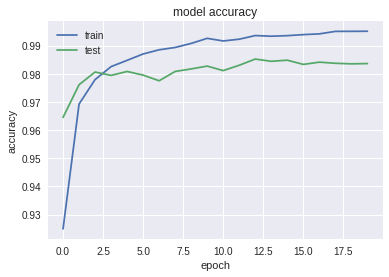

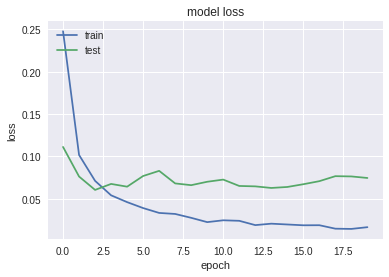

In [8]:
#Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()